In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
df = pd.read_csv('/content/SPAM text message 20170820 - Data.csv', encoding='latin1')

# Rename columns for convenience
df.columns = ['label', 'message']

# Encode label: ham = 0, spam = 1
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# TF-IDF vectorization for text data
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(df['message'])

# Target
y = df['label_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:38:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.87      0.91       149

    accuracy                           0.98      1115
   macro avg       0.97      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.99      0.98      0.98      1115



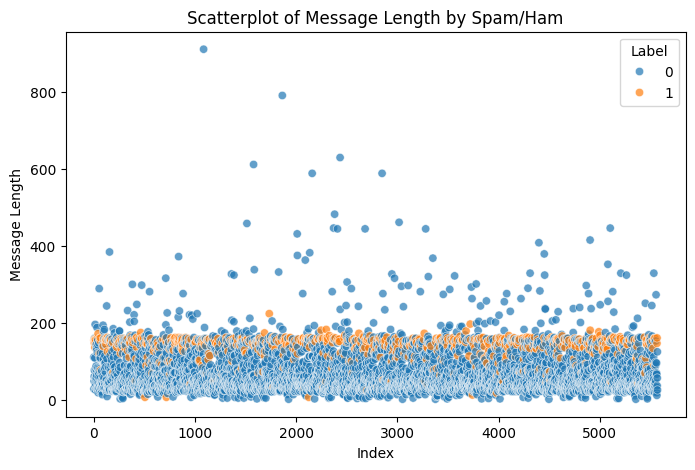

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/SPAM text message 20170820 - Data.csv", encoding="latin-1")
df.columns = ["Label", "Message"]

# Convert labels to binary (spam = 1, ham = 0)
df["Label"] = df["Label"].map({"spam": 1, "ham": 0})

# Feature Engineering: Message Length
df["Message_Length"] = df["Message"].apply(len)

# Scatterplot: Message Length vs. Spam/Ham
plt.figure(figsize=(8,5))
sns.scatterplot(x=df.index, y=df["Message_Length"], hue=df["Label"], alpha=0.7)
plt.title("Scatterplot of Message Length by Spam/Ham")
plt.xlabel("Index")
plt.ylabel("Message Length")
plt.show()

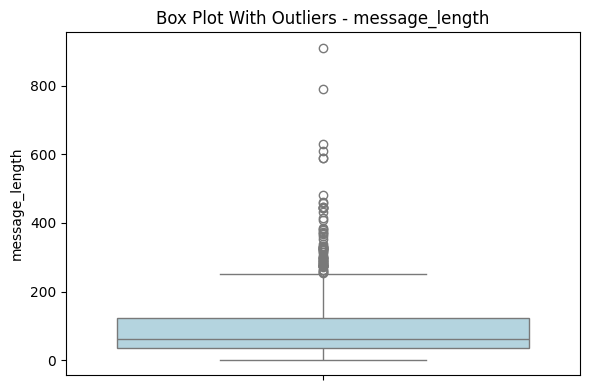

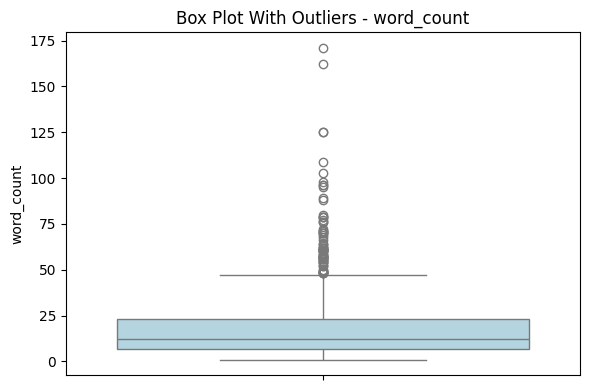

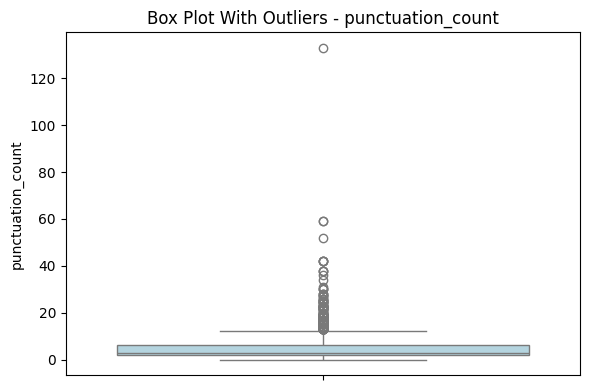

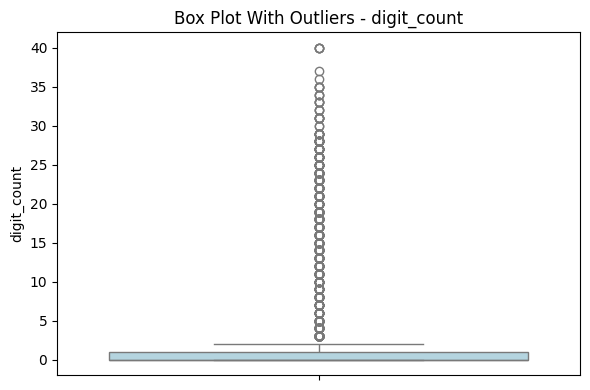

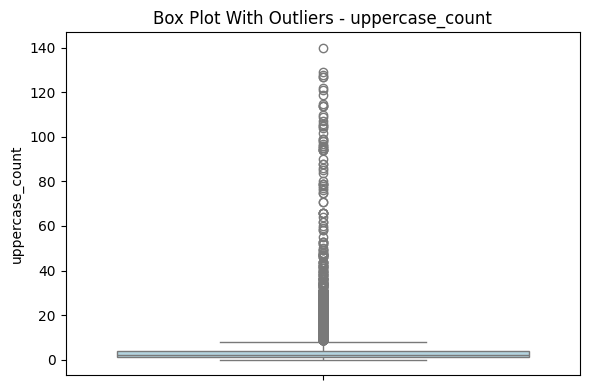

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

# Load dataset
file_path = '/content/SPAM text message 20170820 - Data.csv'
df = pd.read_csv(file_path, encoding='latin1')

# Keep only first two columns and rename
df = df.iloc[:, :2]
df.columns = ['label', 'message']

# Feature engineering
df['message_length'] = df['message'].apply(len)
df['word_count'] = df['message'].apply(lambda x: len(x.split()))
df['punctuation_count'] = df['message'].apply(lambda x: len([c for c in x if c in string.punctuation]))
df['digit_count'] = df['message'].apply(lambda x: len(re.findall(r'\d', x)))
df['uppercase_count'] = df['message'].apply(lambda x: sum(1 for c in x if c.isupper()))

# List of numerical columns
numerical_cols = ['message_length', 'word_count', 'punctuation_count', 'digit_count', 'uppercase_count']

# Generate individual boxplots WITH outliers
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col], color='lightblue')  # showfliers=True by default
    plt.title(f'Box Plot With Outliers - {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


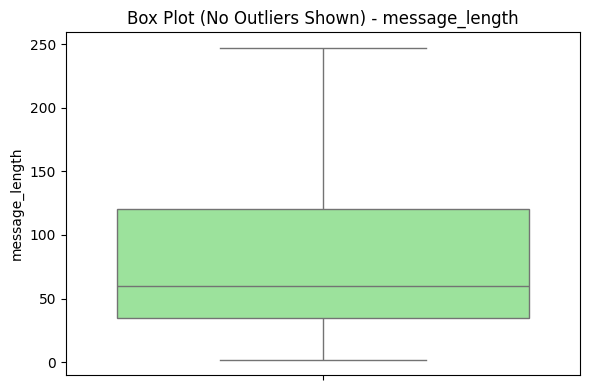

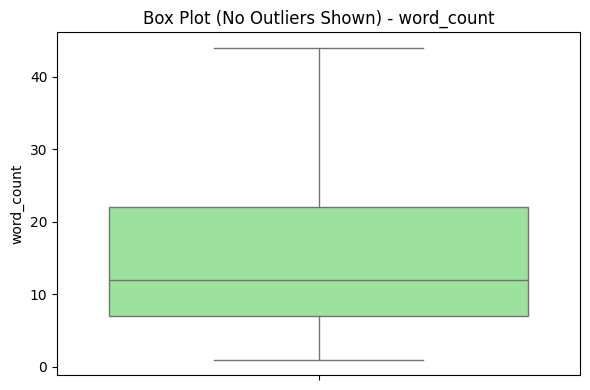

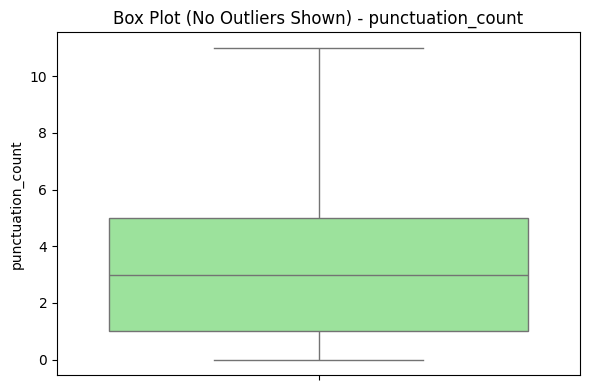

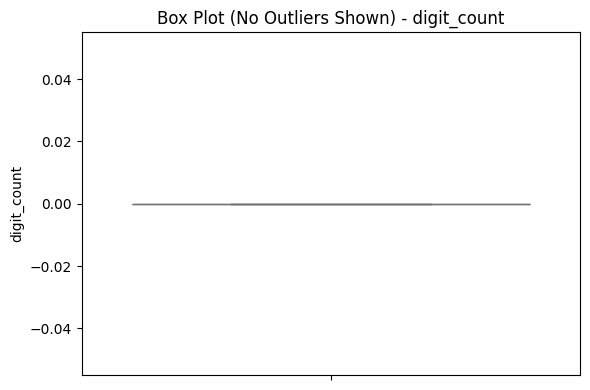

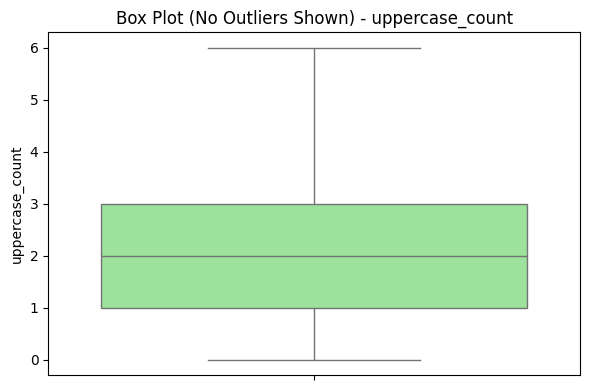

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

# Load and clean dataset
file_path = '/content/SPAM text message 20170820 - Data.csv'
df = pd.read_csv(file_path, encoding='latin1')

# Keep only relevant columns
df = df.iloc[:, :2]
df.columns = ['label', 'message']

# Create numerical features from message
df['message_length'] = df['message'].apply(len)
df['word_count'] = df['message'].apply(lambda x: len(x.split()))
df['punctuation_count'] = df['message'].apply(lambda x: len([c for c in x if c in string.punctuation]))
df['digit_count'] = df['message'].apply(lambda x: len(re.findall(r'\d', x)))
df['uppercase_count'] = df['message'].apply(lambda x: sum(1 for c in x if c.isupper()))

# List of numerical columns
numerical_cols = ['message_length', 'word_count', 'punctuation_count', 'digit_count', 'uppercase_count']

# Plot boxplots for each column without showing outliers
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    filtered_df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

    plt.figure(figsize=(6, 4))
    sns.boxplot(y=filtered_df[col], showfliers=False, color='lightgreen')
    plt.title(f'Box Plot (No Outliers Shown) - {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


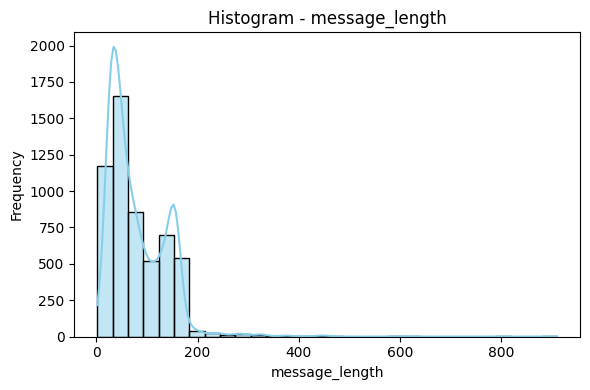

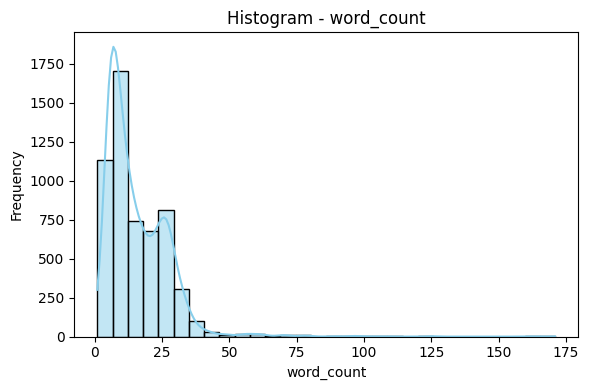

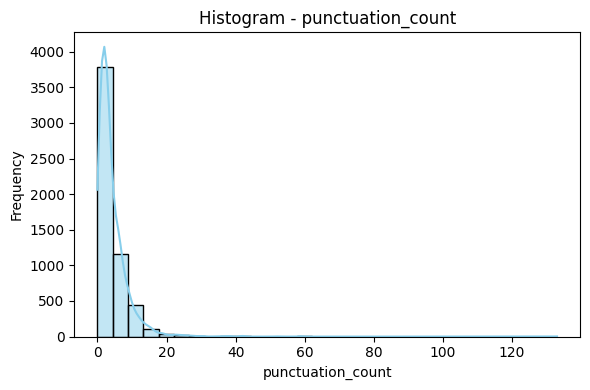

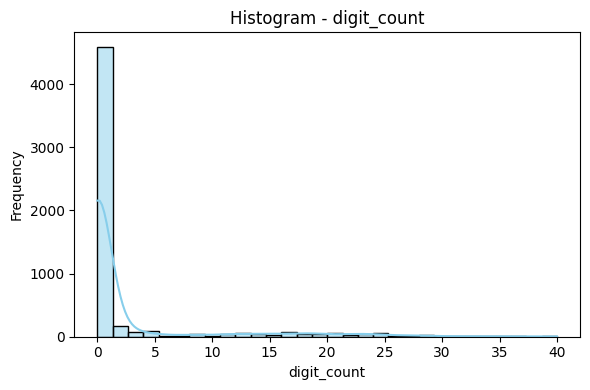

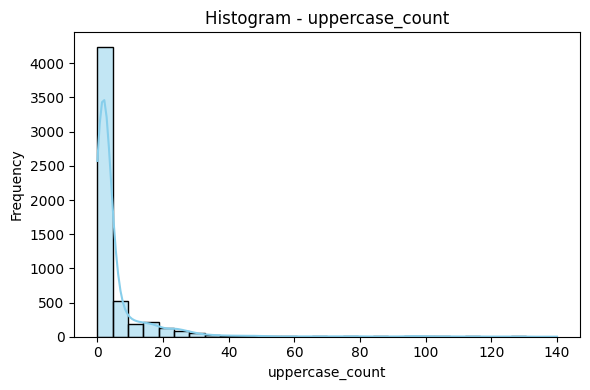

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

# Load dataset
file_path = '/content/SPAM text message 20170820 - Data.csv'
df = pd.read_csv(file_path, encoding='latin1')

# Keep only relevant columns
df = df.iloc[:, :2]
df.columns = ['label', 'message']

# Create numerical features
df['message_length'] = df['message'].apply(len)
df['word_count'] = df['message'].apply(lambda x: len(x.split()))
df['punctuation_count'] = df['message'].apply(lambda x: len([c for c in x if c in string.punctuation]))
df['digit_count'] = df['message'].apply(lambda x: len(re.findall(r'\d', x)))
df['uppercase_count'] = df['message'].apply(lambda x: sum(1 for c in x if c.isupper()))

# List of numerical columns
numerical_cols = ['message_length', 'word_count', 'punctuation_count', 'digit_count', 'uppercase_count']

# Plot histogram for each column
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


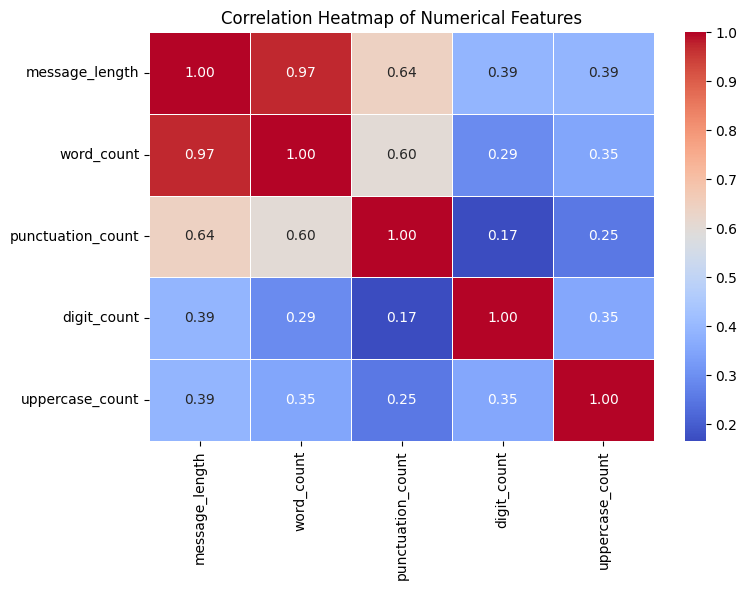

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re

# Load dataset
file_path = '/content/SPAM text message 20170820 - Data.csv'
df = pd.read_csv(file_path, encoding='latin1')

# Keep only relevant columns
df = df.iloc[:, :2]
df.columns = ['label', 'message']

# Create numerical features
df['message_length'] = df['message'].apply(len)
df['word_count'] = df['message'].apply(lambda x: len(x.split()))
df['punctuation_count'] = df['message'].apply(lambda x: len([c for c in x if c in string.punctuation]))
df['digit_count'] = df['message'].apply(lambda x: len(re.findall(r'\d', x)))
df['uppercase_count'] = df['message'].apply(lambda x: sum(1 for c in x if c.isupper()))

# List of numerical columns
numerical_cols = ['message_length', 'word_count', 'punctuation_count', 'digit_count', 'uppercase_count']

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()


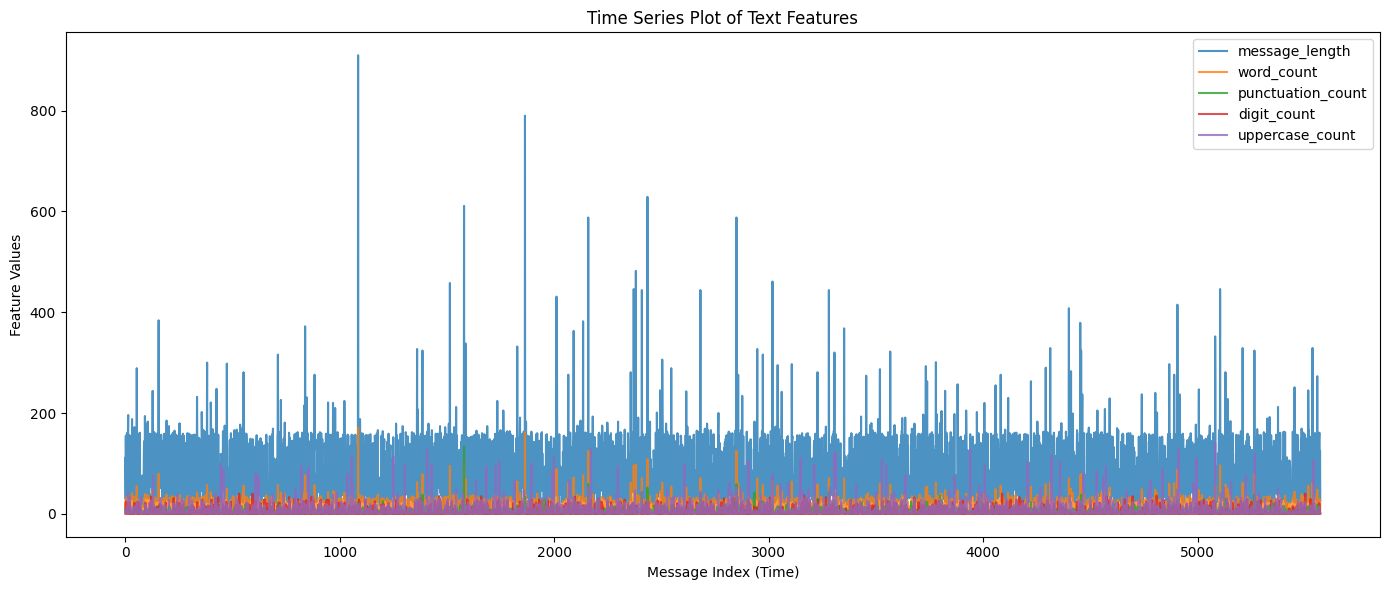

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import re

# Load and clean dataset
file_path = '/content/SPAM text message 20170820 - Data.csv'
df = pd.read_csv(file_path, encoding='latin1')

# Keep only relevant columns
df = df.iloc[:, :2]
df.columns = ['label', 'message']

# Create numerical features
df['message_length'] = df['message'].apply(len)
df['word_count'] = df['message'].apply(lambda x: len(x.split()))
df['punctuation_count'] = df['message'].apply(lambda x: len([c for c in x if c in string.punctuation]))
df['digit_count'] = df['message'].apply(lambda x: len(re.findall(r'\d', x)))
df['uppercase_count'] = df['message'].apply(lambda x: sum(1 for c in x if c.isupper()))

# Create a time index (message order)
df.reset_index(inplace=True)
df.rename(columns={'index': 'time'}, inplace=True)

# Plot time series for all features in one plot
plt.figure(figsize=(14, 6))

# Normalize for better comparison (optional but helpful for scale)
for col in ['message_length', 'word_count', 'punctuation_count', 'digit_count', 'uppercase_count']:
    plt.plot(df['time'], df[col], label=col, alpha=0.8)

plt.title('Time Series Plot of Text Features')
plt.xlabel('Message Index (Time)')
plt.ylabel('Feature Values')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
pip install pandas numpy matplotlib scikit-learn gensim tensorflow keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
exit()


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade gensim


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 7.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found ex

In [ ]:
!pip install gensim==4.0.0
!pip install numpy==1.19.5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gensim
  Running setup.py clean for gensim
Failed to build gensim
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (gensim)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 59.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a pr

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from gensim.models import Word2Vec
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
from sklearn.preprocessing import LabelEncoder


In [ ]:
#build LSTM Model
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("/content/SPAM text message 20170820 - Data.csv", encoding='latin-1')
df.columns = ['label', 'message']

# Encode labels: ham = 0, spam = 1
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Text preprocessing
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['message'])
sequences = tokenizer.texts_to_sequences(df['message'])
padded_sequences = pad_sequences(sequences, padding='post', maxlen=100)

# Split data
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['label'], test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=100),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - accuracy: 0.8631 - loss: 0.4515 - val_accuracy: 0.8664 - val_loss: 0.3942
Epoch 2/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 25s 138ms/step - accuracy: 0.8686 - loss: 0.3937 - val_accuracy: 0.8664 - val_loss: 0.3961
Epoch 3/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.8701 - loss: 0.3920 - val_accuracy: 0.8664 - val_loss: 0.3943
Epoch 4/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - accuracy: 0.8656 - loss: 0.4012 - val_accuracy: 0.8664 - val_loss: 0.3935
Epoch 5/5
140/140 ━━━━━━━━━━━━━━━━━━━━ 11s 73ms/step - accuracy: 0.8658 - loss: 0.4027 - val_accuracy: 0.8664 - val_loss: 0.3955
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8793 - loss: 0.3738
Test Accuracy: 0.8664
